#### 6.1.2 SGD      （W←W-η*(∂L/∂W)）

In [1]:
class SGD:
    
    def __init__(self,lr = 0.01):
        self.lr = lr
    
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

#### 6.1.4  Momentum  v←α*v - η(∂L/∂W)   &nbsp;&nbsp;&nbsp;  W ← W +  v

In [2]:
import numpy as np

In [3]:

class Momentum:
    def __init__(self,lr = 0.01,momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val) # 定义一个规模同val的0数组
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

#### 6.1.5  AdaGrad &nbsp;&nbsp;&nbsp;&nbsp;h←h+((∂L/∂W)⊙(∂L/∂W)) &nbsp;&nbsp;&nbsp;W←W-η\*(1/(h)^½)\*(∂L/∂W)

In [4]:
class AdaGrad:
    
    def __init__(self,lr = 0.01):
        self.lr = lr
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] += grads[key]*grads[key]
                params[key] -= self.lr*grads[key] / (np.sqrt(self.h[key] + 1e7))

##### 6.1.7 简单更新的方法的比较

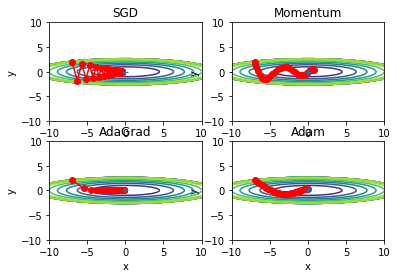

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

##### 6.1.8 基于MNIST数据集的更新方法的比较

===========iteration:0===========
SGD:2.3991871080006857
Momentum:2.3893258823605192
AdaGrad:2.226403254294861
Adam:2.2165440072577036
===========iteration:100===========
SGD:1.3101784360634743
Momentum:0.228816185419842
AdaGrad:0.1273990763554672
Adam:0.20610874581532948
===========iteration:200===========
SGD:0.6613543999400785
Momentum:0.3209335881586835
AdaGrad:0.13010331045274703
Adam:0.24685237385721656
===========iteration:300===========
SGD:0.494976636075602
Momentum:0.20702405912150318
AdaGrad:0.0883807568996819
Adam:0.16565743461176977
===========iteration:400===========
SGD:0.4650879802128126
Momentum:0.2445943171833595
AdaGrad:0.11428702729619108
Adam:0.1813132315805534
===========iteration:500===========
SGD:0.30613897606456797
Momentum:0.20227981772692472
AdaGrad:0.07170578366191398
Adam:0.13181267306643102
===========iteration:600===========
SGD:0.3839064723430978
Momentum:0.17915156589598216
AdaGrad:0.10729328334134197
Adam:0.12447056391049603
===========iteration:700==

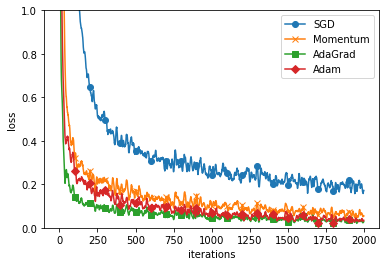

In [6]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
